In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_formats=['svg']
import gerrymetrics as g
%matplotlib inline
%load_ext autoreload
%autoreload 2

congress = pd.read_csv('/Users/wtadler/Repos/gerrymetrics/election_data/congressional_election_results_post1948.csv')
state_leg = pd.read_csv('/Users/wtadler/Repos/gerrymetrics/election_data/state_legislative/state_legislative_election_results_post1971.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


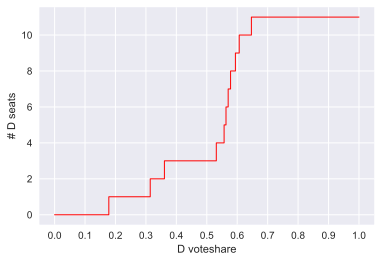

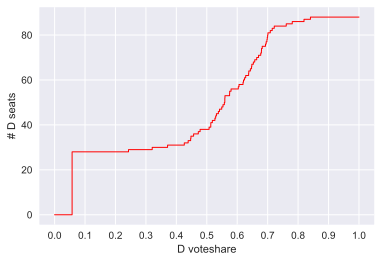

In [19]:
def make_plot(df, state, years):
    if not any(['D Voteshare'==i for i in state_leg.columns]):
        df['D Voteshare'] = df['Dem Votes'] / (df['Dem Votes'] + df['GOP Votes'])
    elex = df.loc[(df['State']==state) & (df['Year'].isin(years)), 'D Voteshare']
    g.plot_seats_votes_curve(elex)
    
make_plot(congress, 'VA', ['2012'])

make_plot(state_leg, 'VA', ['2017'])

Daily Kos Elections presidential

In [31]:
STATE = 'FL'
YEAR = '2016' # '2016' or '2012'
RACE = 'President'
CHAMBER = 'Upper2016map' # 'Upper' or 'Lower' or '' or something else
multiplier = 1

if CHAMBER=='':
    sheet_name = STATE
else:
    sheet_name = STATE + '_' + CHAMBER
    
df = pd.read_excel('/Volumes/GoogleDrive/Team Drives/princeton_gerrymandering_project/databases_and_datasets/elections_data/Daily Kos Elections Statewide Results by LD (public).xlsx',
              sheet_name=sheet_name, header=None)


In [32]:
# remove nan columns and rows
df = df.dropna(axis=1, how='all')
df = df.dropna(axis=0, how='all')

cols = []
for c in df.loc[0]:
    if (type(c) is str) and (not c.startswith('Unnamed')):
        toappend = c
        oldcol = c
    else:
        toappend = oldcol

    cols.append(toappend) # strip leading spaces
df.loc[0] = cols

# fancy transpose for multiindex
df = df.T.set_index([0,1])
df.index = pd.MultiIndex.from_tuples([(x[0], x[1].strip()) for x in df.index]) # strip leading spaces
df = df.T # transpose back to original form (probably not good practice)

# drop last row
df = df[:-1]
N = len(df)

#%%

if RACE=='President':
    if YEAR=='2016':
        dem_candidate = 'Clinton'
        rep_candidate = 'Trump'
    elif YEAR=='2012':
        dem_candidate = 'Obama'
        rep_candidate = 'Romney'
    elif YEAR=='2008':
        dem_candidate = 'Obama'
        rep_candidate = 'McCain'


Dvotes = df.loc[:, YEAR + ' ' + RACE][dem_candidate + '%']
overall_votes = (df.loc[:, YEAR + ' ' + RACE][dem_candidate].sum() /
                 (df.loc[:, YEAR + ' ' + RACE][dem_candidate].sum() + df.loc[:, YEAR + ' ' + RACE][rep_candidate].sum()))


Text(0.5,1,"Does the 2016 Presidential race\n indicate that FL's legislative map is gerrymandered?")

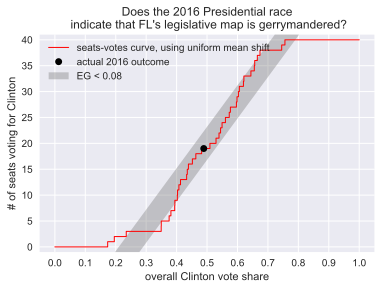

In [50]:
g.plot_seats_votes_curve(Dvotes, multiplier=multiplier)

plt.plot(np.mean(Dvotes)*multiplier, sum(Dvotes>.5), 'ko', label='actual {year} outcome'.format(year=YEAR))

if multiplier==1:
    plt.xlabel('overall ' + dem_candidate + ' vote share')
elif multiplier==100:
    plt.xlabel('overall ' + dem_candidate + ' vote share (%)')

x = np.linspace(0, multiplier, 1000)
eg_margin = .08
plt.fill_between(x, N*(2*x/multiplier-.42), N*(2*x/multiplier-.58), alpha=.4, color='gray', lw=0, label='EG < {}'.format(eg_margin))
plt.ylim([-1, len(Dvotes)+1])

plt.legend(loc='upper left')

plt.ylabel('# of seats voting for ' + dem_candidate)

plt.title('Does the ' + YEAR + ' Presidential race\n indicate that ' + STATE + '\'s legislative map is gerrymandered?')


Redo state legislative election results to have D Voteshare. Also redo the incumbency stuff.